In [1]:
# python3.5 is required
import sys
assert sys.version_info >=(3,5)

# scikit-learn .20 and above is required
import sklearn
assert sklearn.__version__ >= "0,20"

# common imports
import numpy as np
import os
import pandas as pd

# Plotting the pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 14)
mpl.rc('ytick', labelsize = 14)

# Where to save figures
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'chapter_3'
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGE_PATH, exist_ok=True)

# Utility function to save figure
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + '.' + fig_extension)
    print('Saving figure: ', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# MNIST Dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
type(mnist['target'])

numpy.ndarray

In [5]:
df_target = pd.DataFrame(mnist['target'], columns=['target'])

In [6]:
df_target.columns

Index(['target'], dtype='object')

In [7]:
df_target.head()

,target
0,5
1,0
2,4
3,1
4,9


<AxesSubplot:xlabel='target'>

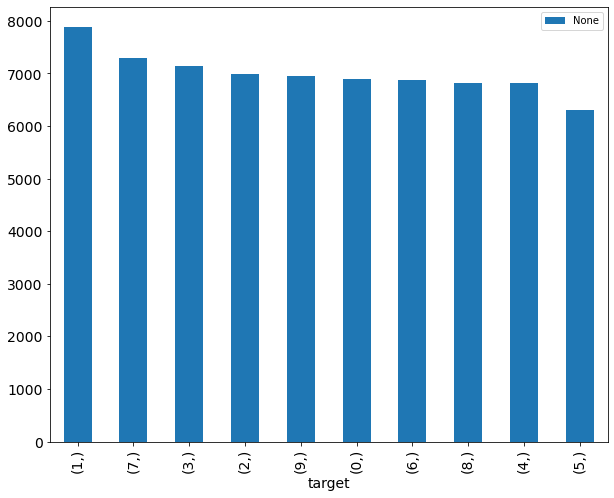

In [8]:
df_target.value_counts().plot(kind='bar', figsize=(10,8), legend=True)

In [9]:
values =df_target.value_counts()

In [10]:
type(values)

pandas.core.series.Series

In [11]:
for i in values:
    result = i/np.sum(values)
    print(result*100)

11.252857142857142
10.418571428571429
10.20142857142857
9.985714285714286
9.94
9.86142857142857
9.822857142857142
9.75
9.748571428571429
9.018571428571429


### Dataset  

In [12]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

(-0.5, 27.5, 27.5, -0.5)

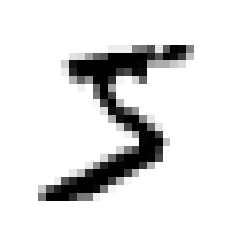

In [13]:
# let's examine one data

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')

In [14]:
y[0]

'5'

In [15]:
# As the target value is in text form, we y to integer
y = y.astype(np.uint8)

# Split Train and Test set

In [16]:
# MNIST dataset is already split into training and test datasets

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
X_train.shape

(60000, 784)

#### We will make a binary classifier which will classify if a row is '5' or 'not 5'

In [18]:
# We will change the y_train to reflect true for 5s and False for not 5s
y_train_5 = (y_train == 5)

In [19]:
y_train_5[0]

True

In [20]:
y_test_5 = (y_test == 5)

In [21]:
y_test_5[0]

False

# Training a model

In [22]:
from sklearn.linear_model import SGDClassifier


In [23]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [24]:
sgd_clf.predict([some_digit])

array([ True])

In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

#### We could make our own cross-validation

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [27]:
# skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state= 42)

# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = y_train_5[train_index]
#     X_test_folds = X_train[test_index]
#     y_test_folds = y_train_5[test_index]
    
#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_folds)
#     n_correct = sum(y_pred == y_test_folds)
#     print(n_correct / len(y_pred))
    

In [28]:
# writing again

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))



0.09735
0.09415
0.0978


In [29]:
# now checking with sklearn cross_val_score

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

### Confusion Matrix

In [30]:
from sklearn.model_selection import cross_val_predict

In [31]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
con_mat = confusion_matrix(y_train_5, y_train_pred)
con_mat

array([[53892,   687],
       [ 1891,  3530]])

In [34]:
precision = 3530/ (3530 + 687)
precision

0.8370879772350012

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [36]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [37]:
recall = 3530 / (3530 + 1891)
recall

0.6511713705958311

In [38]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [39]:
f1 = 2* (recall * precision)/ (recall + precision)
f1

0.7325171197343846

In [40]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Precision/ Recall Tradeoff

In [41]:
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [42]:
threshold = 8000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

### How to change the Threshold

In [43]:
from sklearn.model_selection import cross_val_predict

In [44]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                            cv=3, method='decision_function')

In [45]:
from sklearn.metrics import precision_recall_curve

In [46]:
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

In [47]:
len(thresholds), len(precision), len(recall)

(59966, 59967, 59967)

In [48]:
# plot precision and recall as functions of threshold value

In [49]:
def plot_precision_recall_vs_thresholds(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label='Precision', linewidth=2)
    plt.plot(thresholds, recall[:-1], "g-", label='Recall', linewidth=2)
    plt.legend(loc='center right', fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    plt.figure(figsize=(16,10))
    
    
    

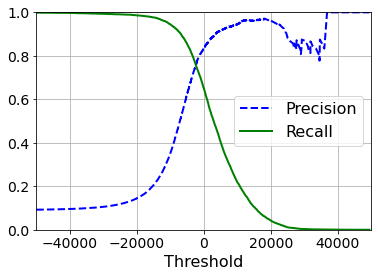

<Figure size 1152x720 with 0 Axes>

In [50]:
plot_precision_recall_vs_thresholds(precision, recall, thresholds)


In [51]:
# recall value at which precision is equals 90
recall_90_precision = recall[np.argmax(precision >= 0.90)]

# threshold value at which precision is equals 90
threshold_90_precision = recall[np.argmax(precision >= 0.90)]

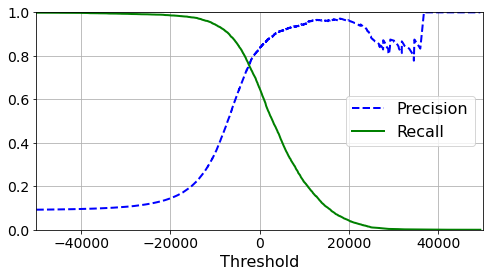

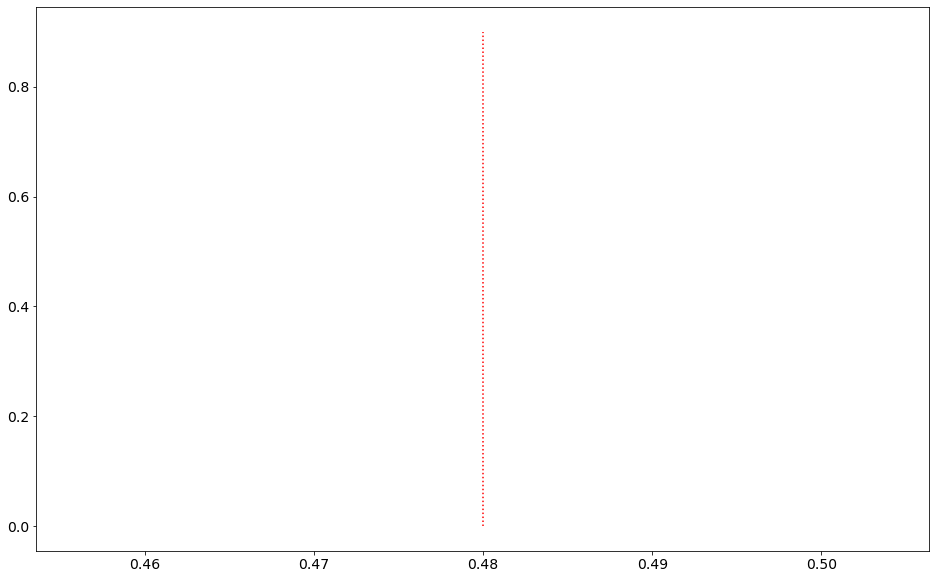

In [52]:
plt.figure(figsize=(8,4))
plot_precision_recall_vs_thresholds(precision, recall, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")

In [53]:
threshold_90_precision

0.4799852425751706

### ROC Curve

In [54]:
from sklearn.metrics import roc_curve

In [56]:
fpr, tpr, theshold = roc_curve(y_train_5, y_scores)

In [57]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.grid(True)    
    plt.xlabel("False Positive Rate/ (1 - Specificity)")
    plt.ylabel("True Positive Rate/ Recall")

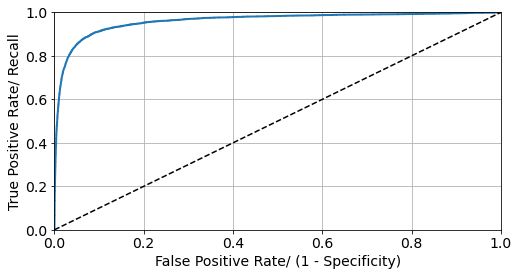

In [58]:
plt.figure(figsize=(8,4))
plot_roc_curve(fpr, tpr)

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## Comparison of ROC and ROC AUC with Random Forest Classifier 

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
forest_clf = RandomForestClassifier(random_state=42)

In [63]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method='predict_proba')

# y_proba_forest returns an array cotaining a row per instance and a column per class. 
# In our class, the first column presents negative class and second column present positive class

In [64]:
type(y_probas_forest)

numpy.ndarray

In [65]:
len(y_probas_forest)

60000

In [66]:
y_probas_forest[:5]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [67]:
y_probas_forest.ndim

2

In [68]:
y_train_5[:5]

array([ True, False, False, False, False])

In [69]:
# Capturing positive class
y_scores_forest = y_probas_forest[:,1]

In [70]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [71]:
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

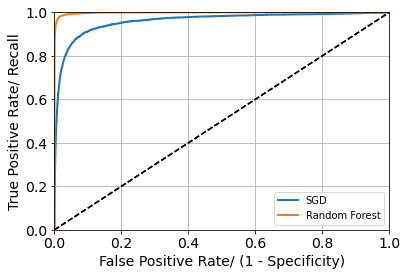

In [72]:
plot_roc_curve(fpr, tpr, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [73]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# Multiclass Classification

In [74]:
# Two strategies:
# One-versus-all: such as 0-detector or 1-detector
# One-versus-one: train a binary classfier for every pair of digits such as one to distinguish
# between 0 and 1

#### Stochastic Gradient Descent

In [78]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [79]:
some_digit.shape

(784,)

In [80]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [81]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [82]:
np.argmax(some_digit_scores)

3

In [83]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Random Forest

In [84]:
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
forest_clf.fit(X_train, y_train)

In [ ]:
forest_clf.predict([some_digit])

In [ ]:
forest_clf.predict_proba([some_digit])

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Error Analysis

In [88]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [89]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [90]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [91]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

<Figure size 576x432 with 0 Axes>

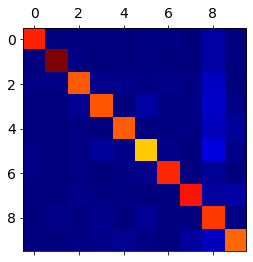

In [99]:
plt.figure(figsize=(8,6))
plt.matshow(conf_mx, cmap=plt.get_cmap('jet'))
plt.show()

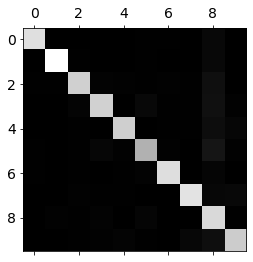

In [102]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#### Let's focus to plot on the erros

In [103]:
# First we need to divide each value in the confusion matrix by the number of images
# in the corresponding class, so that we can compare error rates instead of absolute number
# of errors

In [104]:
type(conf_mx)

numpy.ndarray

In [106]:
row_sum = conf_mx.sum(axis=1, keepdims=True)

In [110]:
row_sum

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [111]:
norm_conf_mx = conf_mx / row_sum 

In [114]:
norm_conf_mx.shape

(10, 10)

In [116]:
# filling the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)

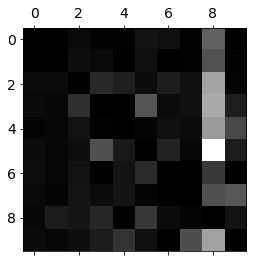

In [119]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

#### Delving into specific Errors

In [120]:
# 3 and 5s are confused

In [126]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [128]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

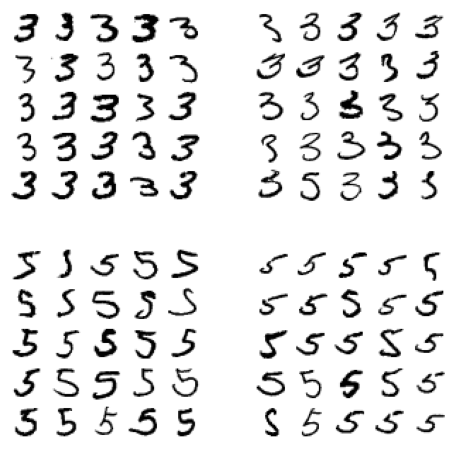

In [129]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()







# Multilabel Classificiation

In [156]:
from sklearn.neighbors import KNeighborsClassifier

In [157]:
def count_true(y_train):
    true_count = 0
    for x in y_train:
        if x:
            true_count += 1
    return true_count




In [158]:
y_train_large = (y_train >= 7)

In [159]:
count_true(y_train_large)

18065

In [160]:
y_train_odd = (y_train % 2 == 1)

In [161]:
count_true(y_train_odd)

30508

In [162]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [164]:
knn_clf = KNeighborsClassifier()

In [165]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [167]:
knn_clf.predict([some_digit])

array([[False,  True]])

# Multioutput Classification

In [168]:
# Multioutput-multilabel classification
# It's simply a generalization of multilabel classficiation where each label can be multiclass
# (i.e. it can have more than two possible values)

In [171]:
np.random.randint(0, 100, (5, 4))

array([[98, 46, 32,  9],
       [49, 11, 92, 56],
       [ 9, 78, 10, 45],
       [64, 92, 59, 89],
       [52, 40, 46, 18]])

In [172]:
noise = np.random.randint(0, 100, (len(X_train), 784) )

In [175]:
noise.shape

(60000, 784)

In [176]:
X_train_mod = X_train + noise

In [177]:
noise_test = np.random.randint(0, 100, (len(X_test), 784))

In [178]:
X_test_mod = X_test + noise_test

In [179]:
X_test_mod.shape

(10000, 784)

In [180]:
y_train_mod = X_train
y_test_mod = X_test

In [181]:
y_train_mod.shape, y_test_mod.shape

((60000, 784), (10000, 784))

ValueError: cannot reshape array of size 1 into shape (28,28)

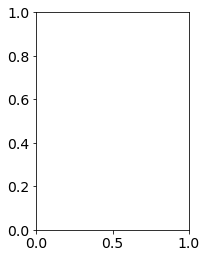

In [184]:
some_index = 0
plt.subplot(121)
plot_digits(X_test_mod[0])
plt.subplot(122)
plot_digits(y_test_mod[some_index])

In [188]:
reshaped_1 = X_test_mod[1].reshape(28,28)

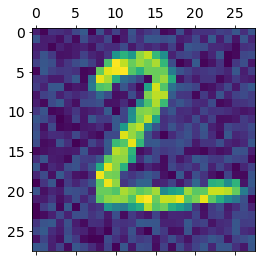

In [189]:
plt.matshow(reshaped_1)

In [190]:
reshaped_1_test = y_test_mod[1].reshape(28,28)

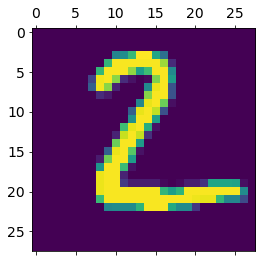

In [191]:
plt.matshow(reshaped_1_test)